In [6]:
#My default packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from dataclasses import dataclass
import itertools
import heapq


# Day 12

In [79]:
with open("input12.txt") as f:
    carte = np.array([list(line.rstrip()) for line in f.readlines()])
heights = np.array([[ord(c)-ord("a") for c in row] for row in carte])
heights[carte=="S"] = 0
heights[carte=="E"] = 25
iS,jS = np.argmax(carte[:,0]=="S"),0
iE,jE = 20,np.argmax(carte[20]=="E")

(-0.5, 160.5, 40.5, -0.5)

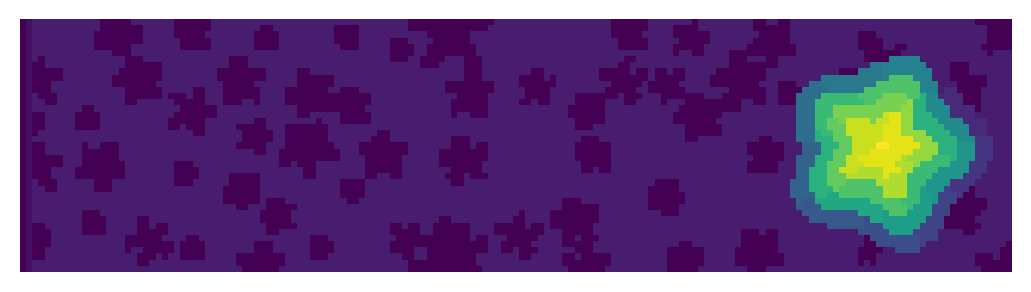

In [26]:
plt.imshow(heights)
plt.axis("off")

In [56]:
from typing import Tuple
@dataclass
class JungleVertex: #Good DJ name
    key: Tuple[int]
    letter : str
    height :int 
    prev : Tuple[int] = None
    distance :int = np.inf
    visited :bool = False

    def __lt__(self,b):
        return self.visited<b.visited or (self.visited ==b.visited and self.distance<b.distance) or (self.visited ==b.visited and self.distance==b.distance and self.height<b.height)

In [186]:
def JungleDijkstra(carte,heights,start):
    N,M = carte.shape
    vertices = {(i,j): JungleVertex((i,j),carte[i,j],heights[i,j]) for (i,j) in itertools.product(range(N),range(M))}

    vertices[start].distance=0
    queue = sorted(list(vertices.values()))
    while queue:

        v = queue.pop(0)
        if not np.isfinite(v.distance):
            return vertices
        v.visited = True
        
        i,j = v.key
        neighbours = (vertices[(ip,jp)] for ip,jp in [(i-1,j),(i+1,j),(i,j-1),(i,j+1)] if  0<=ip and ip<N and jp>=0 and jp<M and not vertices[(ip,jp)].visited)
        for vn in neighbours:

            if (vn.height-v.height)<=1:
                newdist = v.distance+1
                if newdist<vn.distance:
                    vn.distance = newdist
                    vn.prev = (i,j)
            # else:
            #     print("Fail", vn.height-v.height,vn)
        queue.sort()
        # print(v,len(queue))

    return vertices

In [187]:
jungle =JungleDijkstra(carte,heights,(iS,jS))

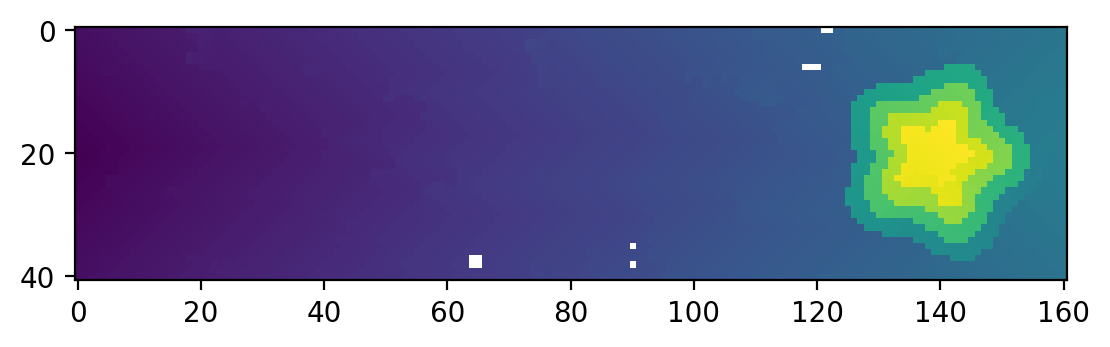

In [189]:
plt.imshow(np.array([[vertices[i,j].distance for j in range(carte.shape[1])] for i in range(carte.shape[0]) ]))


In [190]:
jungle[iE,jE].distance

481

In [152]:
def JungleDijkstra_hikingtrail(carte,heights,start): #we start from E and stop if a node of distance a is reached
    N,M = carte.shape
    vertices = {(i,j): JungleVertex((i,j),carte[i,j],heights[i,j]) for (i,j) in itertools.product(range(N),range(M))}

    vertices[start].distance=0
    queue = sorted(list(vertices.values()))
    while queue:

        v = queue.pop(0)
        if not np.isfinite(v.distance):
            print("Big fail")
            return vertices
        elif v.letter == "a":
            print("Success")
            return v,vertices
        v.visited = True
        
        i,j = v.key
        neighbours = (vertices[(ip,jp)] for ip,jp in [(i-1,j),(i+1,j),(i,j-1),(i,j+1)] if  0<=ip and ip<N and jp>=0 and jp<M and not vertices[(ip,jp)].visited)
        for vn in neighbours:

            if (v.height-vn.height)<=1: #reverse search
                newdist = v.distance+1
                if newdist<vn.distance:
                    vn.distance = newdist
                    vn.prev = (i,j)
            # else:
            #     print("Fail", vn.height-v.height,vn)
        queue.sort()
        # print(v,len(queue))

    return vertices

In [185]:
start,jungle = JungleDijkstra_hikingtrail(carte,heights,(iE,jE))
start.distance

Success


480

In [180]:
hikingtrail = [start.key]
v = start
while v.letter != "E":
    v=jungle[v.prev]
    hikingtrail.append(v.key)
hikingtrail = np.array(hikingtrail).T[::-1]

(-0.5, 160.5, 40.5, -0.5)

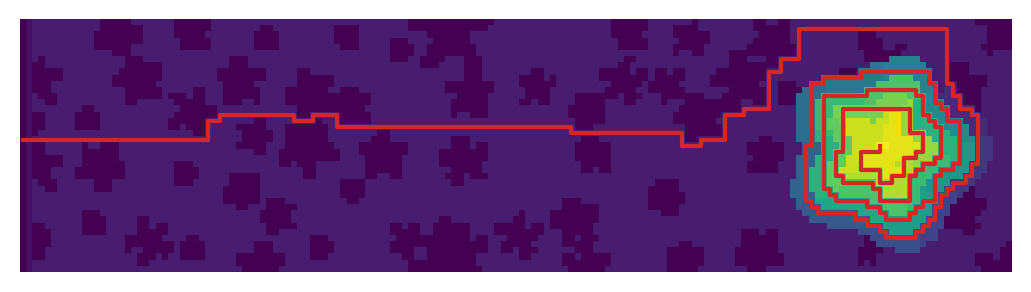

In [183]:
plt.imshow(heights)
plt.plot(*hikingtrail,c="tab:red")
plt.axis("off")

(-0.5, 160.5, 40.5, -0.5)

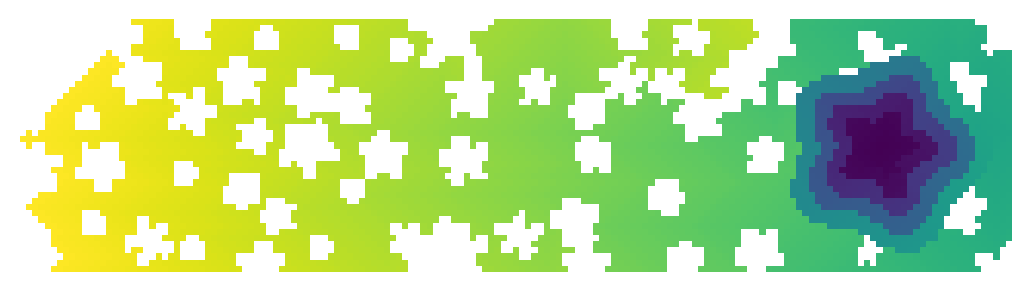

In [184]:
plt.imshow(np.array([[jungle[i,j].distance for j in range(carte.shape[1])] for i in range(carte.shape[0]) ]))
plt.axis("off")
